In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/Medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(2772, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
correlation = df.corr()

<ipython-input-9-bbce1ddb6927>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

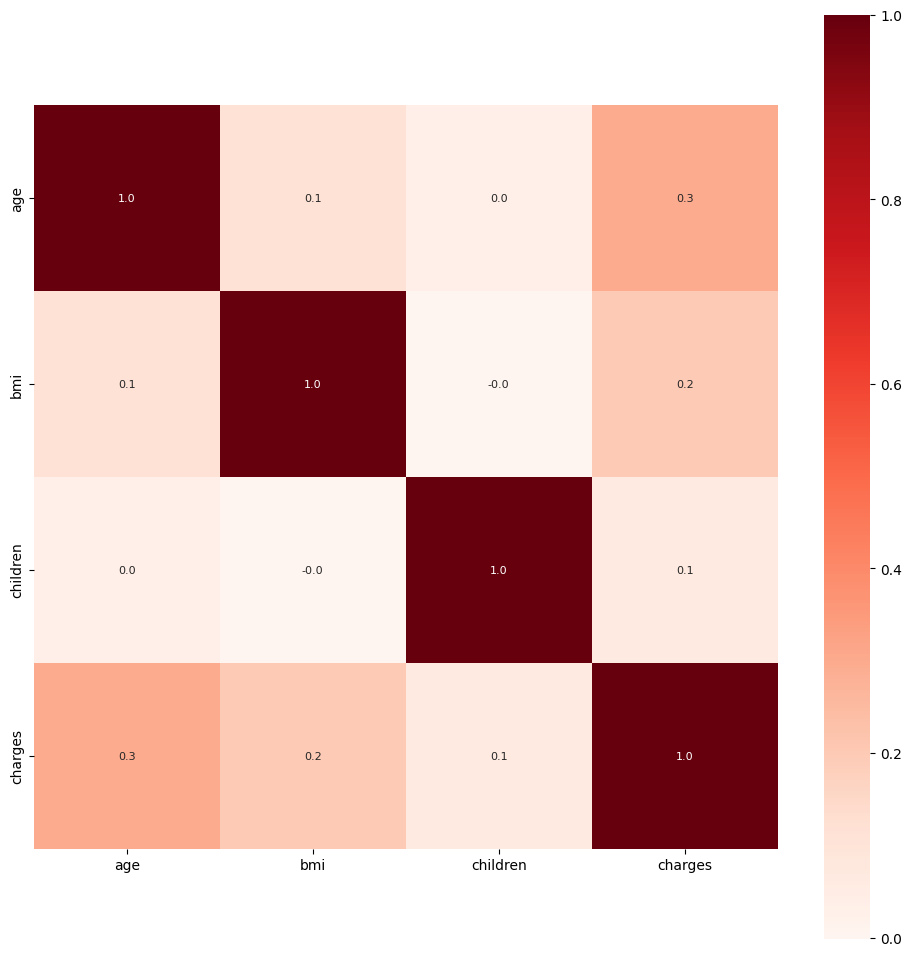

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [11]:
print(correlation['charges'])

age         0.298624
bmi         0.199846
children    0.066442
charges     1.000000
Name: charges, dtype: float64


<ipython-input-12-e6fc1f4279cc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


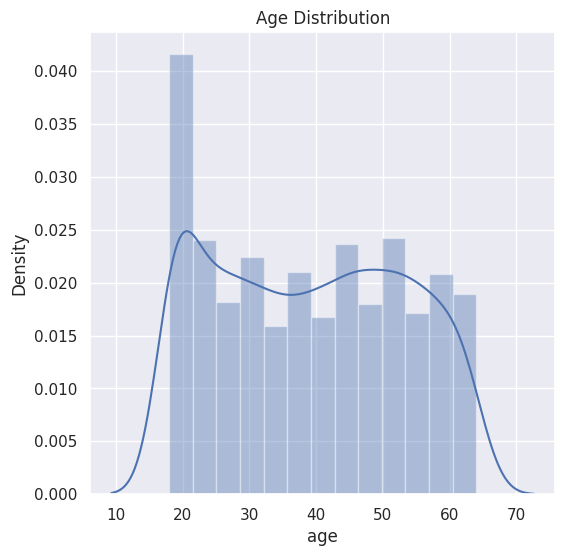

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

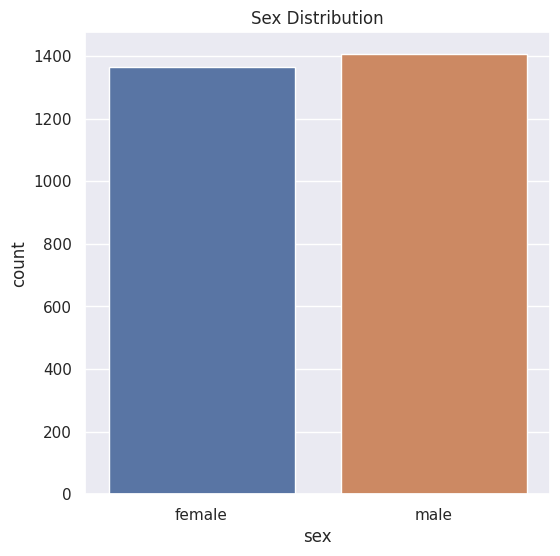

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = df)
plt.title("Sex Distribution")
plt.show()

In [14]:
df['sex'].value_counts()

male      1406
female    1366
Name: sex, dtype: int64

<ipython-input-15-68518dd57a00>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


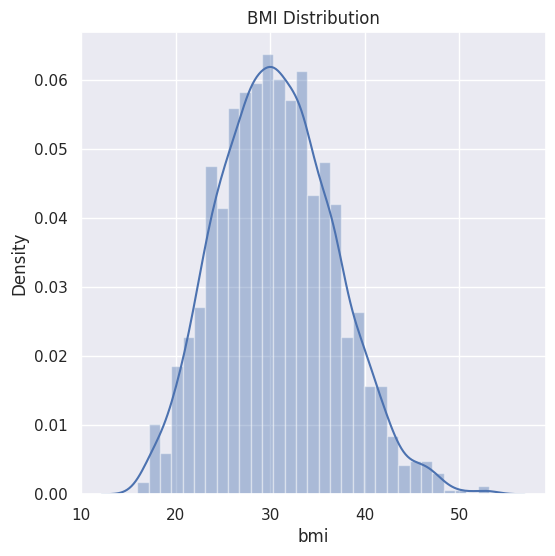

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

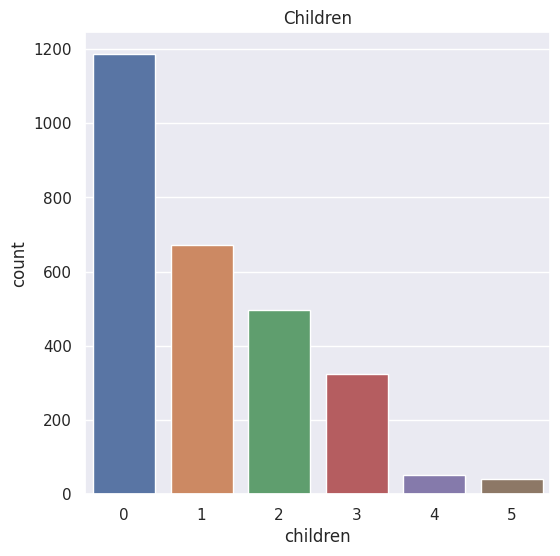

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title("Children")
plt.show()

In [17]:
df['children'].value_counts()

0    1186
1     672
2     496
3     324
4      52
5      42
Name: children, dtype: int64

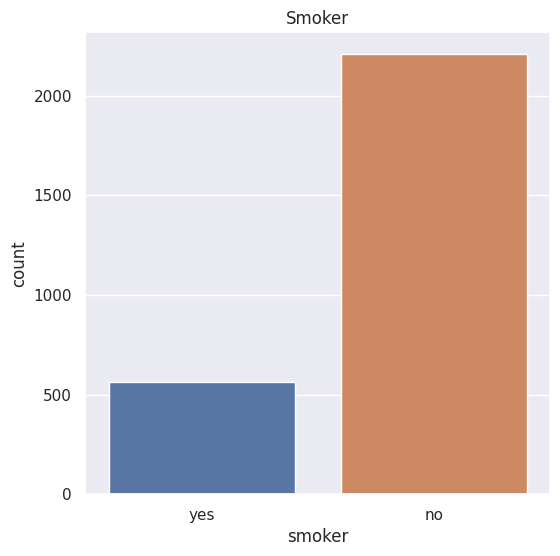

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title("Smoker")
plt.show()

In [19]:
df['smoker'].value_counts()

no     2208
yes     564
Name: smoker, dtype: int64

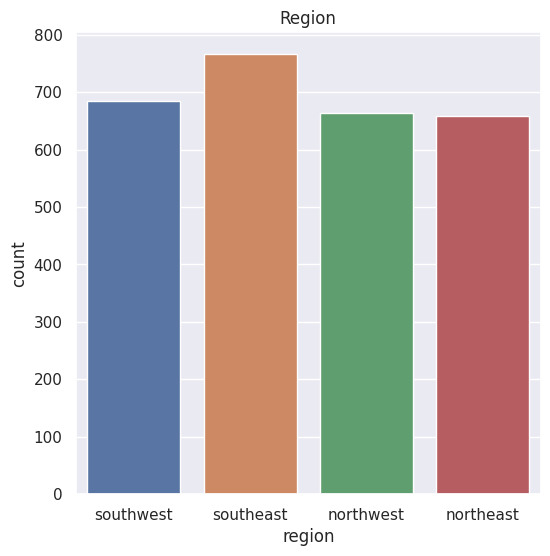

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title("Region")
plt.show()

In [21]:
df['region'].value_counts()

southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64

<ipython-input-22-36e7a4f92464>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


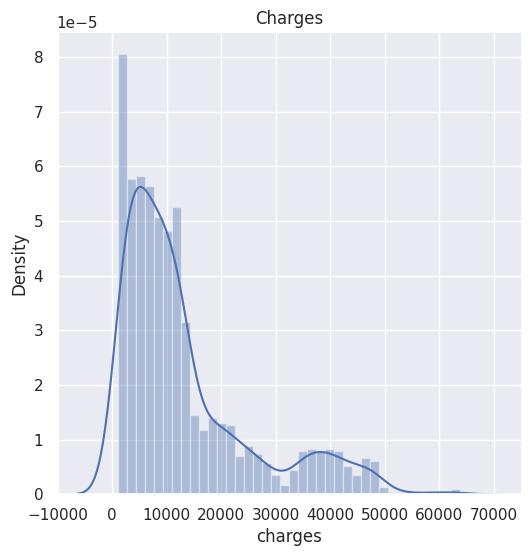

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title("Charges")
plt.show()

In [23]:
print(df.sex.value_counts())
print(df.smoker.value_counts())
print(df.region.value_counts())

male      1406
female    1366
Name: sex, dtype: int64
no     2208
yes     564
Name: smoker, dtype: int64
southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64


In [24]:
df.replace({'sex':{'male':0, 'female':1}},inplace = True)

In [25]:
df.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)df.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)

In [26]:
df.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace = True)

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [28]:
correlation = df.corr()

<Axes: >

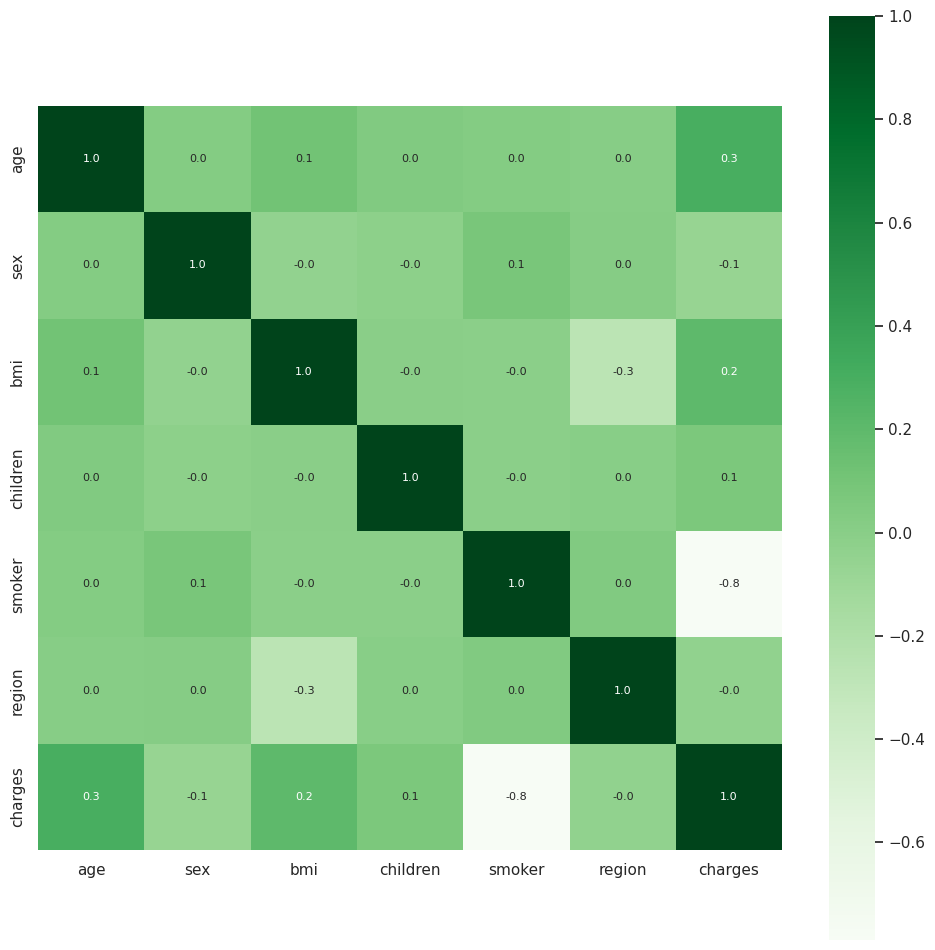

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [30]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [31]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       1       0
2768   21    1  34.600         0       1       1
2769   19    0  26.030         1       0       2
2770   23    0  18.715         0       1       2
2771   54    0  31.600         0       1       1

[2772 rows x 6 columns]


In [32]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(2772, 6) (2217, 6) (555, 6)


In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, Y_train)

LinearRegression()

In [37]:
prediction_training = model.predict(X_train)

In [38]:
score_1 = metrics.r2_score(Y_train, prediction_training)
print(score_1)

0.7562733333619166


In [39]:
score_2 = metrics.mean_absolute_error(Y_train, prediction_training)
print(score_2)

4120.034073152379


In [40]:
prediction_testing = model.predict(X_test)

In [41]:
score_3 = metrics.r2_score(Y_test, prediction_testing)
print(score_3)

0.7286369287098544


In [42]:
score_4 = metrics.mean_absolute_error(Y_test, prediction_testing)
print(score_4)

4309.007773228404


In [43]:
input_data = (45,1,12,2,1,3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print('The insurance cost is:',prediction)

The insurance cost is: [4622.16416405]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
